In [1]:
import numpy as np
import pandas as pd
import webcolors
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier  
import matplotlib.pyplot as plt

In [2]:
image1 = "data/data4-noise.png"
image2 = "data/data5-noise.png"
image3 = "data/data6-noise.png"

In [3]:
colors_dict = {
    '#ffffff': ('white', 0),
    '#ff0000': ('red', 1),
    '#ffbf00': ('orange', 2),
    '#ffff00': ('yellow', 3),
    '#00ff00': ('green', 4),
    '#00bfff': ('blue', 5),
    '#0000ff': ('dark blue', 6),
    '#551a8b': ('purple', 7),
    '#ffb6c1': ('pink', 8),
    '#000000': ('black', 9)
}

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in colors_dict.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
    return closest_name

get_colour_name((181, 230, 29))

('yellow', 3)

In [4]:
def write_data_to_csv(source: str, dest_path: str):
    image = Image.open(source)
    width, height = image.size
    with open(dest_path, 'w') as dest_file:
        for x in range(0, width):
            for y in range(0, height):
                color, color_num = closest_colour(image.getpixel((x,y)))
                if color != 'white':
                    dest_file.write(f'{x};{y};{color};{color_num}\n')

In [65]:
write_data_to_csv(image1, 'dataset1.csv')

In [5]:
dataset1 = 'labeled-data/labeled-dataset1.csv'
dataset2 = 'labeled-data/labeled-dataset2.csv'
dataset3 = 'labeled-data/labeled-dataset3.csv'

In [6]:
dataset1_df = pd.read_csv(dataset1, sep=';', names=['x', 'y', 'color_name', 'color_num'])

In [7]:
X = dataset1_df.iloc[:, 0:2]
y = dataset1_df.iloc[:, 3]
clf = KNeighborsClassifier(4, weights='uniform')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [20]:
X.iloc[:, 0].min()

0

In [8]:
h = 0.02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

In [9]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

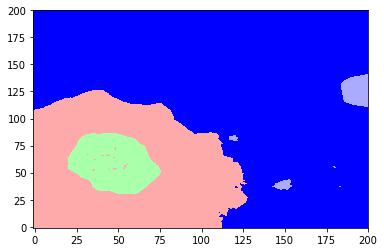

In [10]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#0000FF'])
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.show()